# Initial EDA

In [1]:
# Importing packages
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Creating new columns
### Day-of-the-week column

In [2]:
# Loading data
df = pd.read_csv('initial_data2.csv')

# Converting Date column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Creating day of the week column
df['day_of_week'] = df['Date'].dt.day_name()

### Weekend Boolean column

In [3]:
# Define the function to find weekend values
def weekend(dow):
    if dow == 'Saturday' or dow == 'Sunday':
        return True
    else:
        return False
    
# Apply the function to the Age column using the apply() function
df['weekend'] = df['day_of_week'].apply(weekend)

### Season column

In [4]:
# Defining function to identify season
def get_season(date):
    month = date.month
    day = date.day
    if month in [3, 4, 5]:
        season = 'spring'
    elif month in [6, 7, 8]:
        season = 'summer'
    elif month in [9, 10, 11]:
        season = 'fall'
    else:
        season = 'winter'
    

    if month == 3 and day < 20:
        season = 'winter'
    elif month == 6 and day < 21:
        season = 'spring'
    elif month == 9 and day < 22:
        season = 'summer'
    elif month == 12 and day < 21:
        season = 'fall'
    
    return season

# Applying function and creating season column
df['season'] = df['Date'].apply(get_season)

### Holiday Season Column

In [5]:
# Define function to find some major holiday values 
def is_holiday_season(date):
    holidays = [
        datetime.date(date.year, 1, 1),   # New Year's Day
        datetime.date(date.year, 7, 4),   # Independence Day
        datetime.date(date.year, 12, 25), # Christmas Day
        datetime.date(date.year, 11, 4) + datetime.timedelta(weeks=3, days=3),  # Thanksgiving Day: 4th Thursday of November
        datetime.date(date.year, 5, 31) - datetime.timedelta(days=(datetime.date(date.year, 5, 31).weekday() + 1) % 7),  # Memorial Day: last Monday of May
        datetime.date(date.year, 9, 1) + datetime.timedelta(days=7-datetime.date(date.year, 9, 1).weekday()),  # Labor Day: first Monday of September
        datetime.date(date.year, 11, 11),  # Veteran's Day
        datetime.date(date.year, 1, 15) + datetime.timedelta(days=1-datetime.date(date.year, 1, 15).weekday())  # MLK Day: third Monday of January
    ]
    
    # Adding a three day buffer area around each holiday to create a "holiday season"
    for holiday in holidays:
        if (date.date() - datetime.timedelta(days=3)) <= holiday <= (date.date() + datetime.timedelta(days=3)):
            return True
    
    return False

# Create holiday season column
df['holiday_season'] = df['Date'].apply(is_holiday_season)

### Vaccine Announcement Column 

In [6]:
# Define a list of unique announcement dates
announcement_dates = [
    "04/28/2023", "04/27/2023", "04/18/2023", "03/14/2023", "03/10/2023",
    "12/16/2022", "12/08/2022", "10/21/2022", "10/12/2022", "09/13/2022",
    "08/31/2022", "08/26/2022", "08/19/2022", "07/13/2022", "07/08/2022",
    "06/30/2022", "06/17/2022", "05/17/2022", "05/05/2022", "04/29/2022",
    "04/15/2022", "04/01/2022", "03/29/2022", "03/21/2022", "03/11/2022",
    "02/11/2022", "02/01/2022", "01/31/2022", "01/11/2022", "01/07/2022",
    "01/03/2022", "12/17/2021", "12/14/2021", "12/09/2021", "11/30/2021",
    "11/19/2021", "10/29/2021", "10/26/2021", "10/22/2021", "10/20/2021",
    "10/14/2021", "10/01/2021", "09/24/2021", "09/22/2021", "09/20/2021",
    "09/17/2021", "09/10/2021", "09/02/2021", "09/01/2021", "08/24/2021",
    "08/23/2021", "08/18/2021", "08/13/2021", "08/12/2021", "08/06/2021",
    "08/03/2021", "07/30/2021", "07/16/2021", "07/13/2021", "07/08/2021",
    "07/06/2021", "07/02/2021", "06/29/2021", "06/25/2021", "06/15/2021",
    "06/11/2021", "06/10/2021", "05/25/2021", "05/19/2021", "05/11/2021",
    "05/10/2021", "04/27/2021", "04/23/2021", "04/21/2021", "04/16/2021",
    "04/13/2021", "04/12/2021", "04/01/2021", "03/26/2021", "03/24/2021",
    "03/17/2021", "03/05/2021", "03/02/2021", "02/27/2021", "02/26/2021",
    "02/25/2021", "02/23/2021", "02/22/2021", "02/12/2021", "02/05/2021",
    "02/04/2021", "01/29/2021", "01/14/2021", "01/04/2021", "12/28/2020",
    "12/22/2020", "12/21/2020", "12/18/2020", "12/17/2020", "12/14/2020", "12/12/2020"
]

# Convert to datetime and deduplicate
announcement_dates = list(set([pd.to_datetime(date) for date in announcement_dates]))


# Check if the date in the dataset is within a week of any announcement dates
def near_announcement(date):
    for announcement in announcement_dates:
        if announcement <= date <= (announcement + pd.Timedelta(days=7)):
            return True
    return False

# Create the 'vax_announcement' column
df['vax_announcement'] = df['Date'].apply(near_announcement)


### Finding NaN values and removing variables

In [7]:
### Finding data subset correspondign with first vaccine release 

In [8]:
summary = df.describe()
#summary = summary.T
print(summary)

          MMWR_week   Distributed  Distributed_Janssen  Distributed_Moderna  \
count  38488.000000  3.848800e+04         3.848800e+04         3.848800e+04   
mean      23.434447  1.543719e+07         6.895489e+05         5.803219e+06   
std       15.406757  6.751604e+07         2.981533e+06         2.533753e+07   
min        1.000000  0.000000e+00         0.000000e+00         0.000000e+00   
25%       10.000000  9.751162e+05         2.350000e+04         2.433700e+05   
50%       20.000000  3.837018e+06         1.724000e+05         1.501160e+06   
75%       36.000000  1.004543e+07         4.578000e+05         3.962520e+06   
max       53.000000  9.844443e+08         3.249690e+07         3.522477e+08   

       Distributed_Pfizer  Distributed_Novavax  Distributed_Unk_Manuf  \
count        3.848800e+04         2.688000e+03           3.848800e+04   
mean         8.695934e+06         3.107299e+04           2.081914e+03   
std          3.895544e+07         1.253715e+05           8.327526e+04

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38488 entries, 0 to 38487
Columns: 114 entries, Date to vax_announcement
dtypes: bool(3), datetime64[ns](1), float64(65), int64(42), object(3)
memory usage: 32.7+ MB


In [10]:
# find na value counts

In [11]:
missing_counts = df.isna().sum()

# Sort the missing value counts in descending order
missing_counts_sorted = missing_counts.sort_values(ascending=False)

# Display the sorted missing value counts
with pd.option_context("display.max_rows", None):
    print(missing_counts_sorted)

Second_Booster                            38385
Bivalent_Booster_5Plus                    36568
Bivalent_Booster_5Plus_Pop_Pct            36568
Bivalent_Booster_12Plus_Pop_Pct           36504
Bivalent_Booster_65Plus_Pop_Pct           36504
Bivalent_Booster_65Plus                   36504
Bivalent_Booster_18Plus_Pop_Pct           36504
Bivalent_Booster_12Plus                   36504
Bivalent_Booster_18Plus                   36504
Admin_Bivalent_PFR                        36312
Admin_Bivalent_MOD                        36312
Dist_Bivalent_MOD                         36312
Dist_Bivalent_PFR                         36312
Administered_Bivalent                     36248
Series_Complete_Novavax                   35808
Administered_Novavax                      35807
Distributed_Novavax                       35800
Additional_Doses_5Plus                    35544
Additional_Doses_5Plus_Vax_Pct            35544
Second_Booster_Unk_Manuf                  31907
Second_Booster_Janssen                  

In [12]:
# columns with over 1000 missing values

In [13]:
columns_with_over_1000_missing = missing_counts_sorted[missing_counts_sorted > 1000].index

# Return the names of columns with missing value sum over 1000
columns_with_over_1000_missing

Index(['Second_Booster', 'Bivalent_Booster_5Plus',
       'Bivalent_Booster_5Plus_Pop_Pct', 'Bivalent_Booster_12Plus_Pop_Pct',
       'Bivalent_Booster_65Plus_Pop_Pct', 'Bivalent_Booster_65Plus',
       'Bivalent_Booster_18Plus_Pop_Pct', 'Bivalent_Booster_12Plus',
       'Bivalent_Booster_18Plus', 'Admin_Bivalent_PFR', 'Admin_Bivalent_MOD',
       'Dist_Bivalent_MOD', 'Dist_Bivalent_PFR', 'Administered_Bivalent',
       'Series_Complete_Novavax', 'Administered_Novavax',
       'Distributed_Novavax', 'Additional_Doses_5Plus',
       'Additional_Doses_5Plus_Vax_Pct', 'Second_Booster_Unk_Manuf',
       'Second_Booster_Janssen', 'Second_Booster_Pfizer',
       'Second_Booster_Moderna', 'Second_Booster_65Plus_Vax_Pct',
       'Second_Booster_65Plus', 'Second_Booster_50Plus_Vax_Pct',
       'Second_Booster_50Plus', 'Additional_Doses_12Plus',
       'Additional_Doses_12Plus_Vax_Pct', 'Series_Complete_Unk_Manuf_5Plus',
       'Series_Complete_Moderna_5Plus', 'Series_Complete_Janssen_5Plus',
  

In [14]:
df = df.drop(columns=columns_with_over_1000_missing)

In [15]:
#df.shape

In [16]:
df.columns

Index(['Date', 'MMWR_week', 'Location', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf',
       'Dist_Per_100K', 'Distributed_Per_100k_5Plus',
       'Distributed_Per_100k_12Plus', 'Distributed_Per_100k_18Plus',
       'Distributed_Per_100k_65Plus', 'Administered', 'Administered_5Plus',
       'Administered_12Plus', 'Administered_18Plus', 'Administered_65Plus',
       'Administered_Janssen', 'Administered_Moderna', 'Administered_Pfizer',
       'Administered_Unk_Manuf', 'Admin_Per_100K', 'Admin_Per_100k_5Plus',
       'Admin_Per_100k_12Plus', 'Admin_Per_100k_18Plus',
       'Admin_Per_100k_65Plus', 'Recip_Administered',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administere

In [17]:
df.head()

Date  MMWR_week Location  Distributed  Distributed_Janssen  \
0 2023-05-10         19       NE      5481710               152400   
1 2023-05-10         19       LA     10282120               330500   
2 2023-05-10         19       GA     28727475               869100   
3 2023-05-10         19       WY      1281755                49300   
4 2023-05-10         19       CO     17769135               501900   

   Distributed_Moderna  Distributed_Pfizer  Distributed_Unk_Manuf  \
0              1647380             2905630                      0   
1              3807980             5164550                      0   
2              9763000            14773655                      0   
3               490040              585605                      0   
4              5402640             9029715                      0   

   Dist_Per_100K  Distributed_Per_100k_5Plus  ...  \
0         283379                    303944.0  ...   
1         221178                    236516.0  ...   
2         270569                    288404.0  ...   
3         221466                    235691.0  ...   
4         308560                    327449.0  ...   

   Additional_Doses_65Plus_Vax_Pct  Additional_Doses_Moderna  \
0                             80.7                  265916.0   
1                             69.6                  486814.0   
2                             67.8                 1155986.0   
3                             71.2                   66344.0   
4                             81.0                 1019757.0   

   Additional_Doses_Pfizer  Additional_Doses_Janssen  \
0                 443827.0                    7164.0   
1                 608975.0                   14004.0   
2                1518137.0                   26699.0   
3                  77096.0                    1930.0   
4                1410438.0                   27303.0   

   Additional_Doses_Unk_Manuf  day_of_week  weekend  season  holiday_season  \
0                      1215.0    Wednesday    False  spring           False   
1                       364.0    Wednesday    False  spring           False   
2                      4168.0    Wednesday    False  spring           False   
3                       214.0    Wednesday    False  spring           False   
4                      2547.0    Wednesday    False  spring           False   

   vax_announcement  
0             False  
1             False  
2             False  
3             False  
4             False  

[5 rows x 80 columns]

In [18]:
columns_to_drop = [
       'Administered_Dose1_Recip',   
       'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_12Plus',  
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_65Plus', 
        'Series_Complete_Yes',
        'Series_Complete_5Plus',
        'Series_Complete_12Plus',
        'Series_Complete_18Plus',
       'Series_Complete_65Plus',
       'Additional_Doses_18Plus', 
       'Additional_Doses_50Plus', 
       'Additional_Doses_65Plus']

In [19]:
# Dropping the columns from the df
df = df.drop(columns = columns_to_drop)

In [20]:
df.columns

Index(['Date', 'MMWR_week', 'Location', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf',
       'Dist_Per_100K', 'Distributed_Per_100k_5Plus',
       'Distributed_Per_100k_12Plus', 'Distributed_Per_100k_18Plus',
       'Distributed_Per_100k_65Plus', 'Administered', 'Administered_5Plus',
       'Administered_12Plus', 'Administered_18Plus', 'Administered_65Plus',
       'Administered_Janssen', 'Administered_Moderna', 'Administered_Pfizer',
       'Administered_Unk_Manuf', 'Admin_Per_100K', 'Admin_Per_100k_5Plus',
       'Admin_Per_100k_12Plus', 'Admin_Per_100k_18Plus',
       'Admin_Per_100k_65Plus', 'Recip_Administered',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Pop_Pct',
       'Series_Complete_5PlusPop_Pct', 'Series_Complet

In [21]:
df['Additional_Doses_Vax_Pct' ]

0        55.8
1        43.3
2        44.3
3        47.3
4        57.9
         ... 
38483     0.0
38484     0.0
38485     0.0
38486     0.0
38487     0.0
Name: Additional_Doses_Vax_Pct, Length: 38488, dtype: float64

In [22]:
missing_counts = df.isna().sum()

# Sort the missing value counts in descending order
missing_counts_sorted = missing_counts.sort_values(ascending=False)

# Display the sorted missing value counts
with pd.option_context("display.max_rows", None):
    print(missing_counts_sorted)

Admin_Per_100k_5Plus                      448
Administered_5Plus                        448
Distributed_Per_100k_5Plus                448
Series_Complete_5PlusPop_Pct              448
Administered_Dose1_Recip_5PlusPop_Pct     448
Additional_Doses_Unk_Manuf                331
Additional_Doses_Janssen                  327
Additional_Doses_Pfizer                   325
Additional_Doses_Moderna                  325
Additional_Doses_65Plus_Vax_Pct           325
Additional_Doses_18Plus_Vax_Pct           325
Additional_Doses_Vax_Pct                  325
Series_Complete_Unk_Manuf_65Plus            9
Series_Complete_Unk_Manuf_12Plus            4
Series_Complete_Unk_Manuf                   4
Series_Complete_Unk_Manuf_18Plus            4
Administered_Unk_Manuf                      3
Series_Complete_Pfizer_12Plus               0
Date                                        0
Series_Complete_Moderna_12Plus              0
Series_Complete_Janssen_18Plus              0
Series_Complete_Pfizer            

In [23]:
pred_var = 'Additional_Doses_Vax_Pct' 

In [24]:
first_non_zero_date = df.loc[df[pred_var] != 0, 'Date'].min()

print("The first date with a non-zero percentage is:", first_non_zero_date)

The first date with a non-zero percentage is: 2021-09-25 00:00:00


In [25]:
# Define the given date
given_date = pd.to_datetime('2021-09-25')  # Adjust the date as needed

# Subset the DataFrame to include rows with dates greater than the given date
df = df[df['Date'] > given_date]

In [26]:
# final df size after removing unrelated variables and subsetting dates.
df.shape

(19930, 67)

### Correlation

In [27]:
correlations = df.corrwith(df.Additional_Doses_Vax_Pct)
correlations.sort_values(ascending = False)

Additional_Doses_Vax_Pct           1.000000
Additional_Doses_18Plus_Vax_Pct    0.997538
Additional_Doses_50Plus_Vax_Pct    0.987938
Additional_Doses_65Plus_Vax_Pct    0.968749
Admin_Per_100k_5Plus               0.773995
                                     ...   
Distributed_Unk_Manuf             -0.043341
holiday_season                    -0.063956
weekend                           -0.090263
vax_announcement                  -0.197474
MMWR_week                         -0.506858
Length: 63, dtype: float64

In [28]:
high_corr = correlations[abs(correlations) > 0.5]
high_corr

MMWR_week                               -0.506858
Dist_Per_100K                            0.652624
Distributed_Per_100k_5Plus               0.772793
Distributed_Per_100k_12Plus              0.620770
Distributed_Per_100k_18Plus              0.625260
Admin_Per_100K                           0.639276
Admin_Per_100k_5Plus                     0.773995
Admin_Per_100k_12Plus                    0.586445
Admin_Per_100k_18Plus                    0.597145
Admin_Per_100k_65Plus                    0.621125
Administered_Dose1_Recip_5PlusPop_Pct    0.678826
Series_Complete_5PlusPop_Pct             0.710834
Additional_Doses_Vax_Pct                 1.000000
Additional_Doses_18Plus_Vax_Pct          0.997538
Additional_Doses_50Plus_Vax_Pct          0.987938
Additional_Doses_65Plus_Vax_Pct          0.968749
dtype: float64

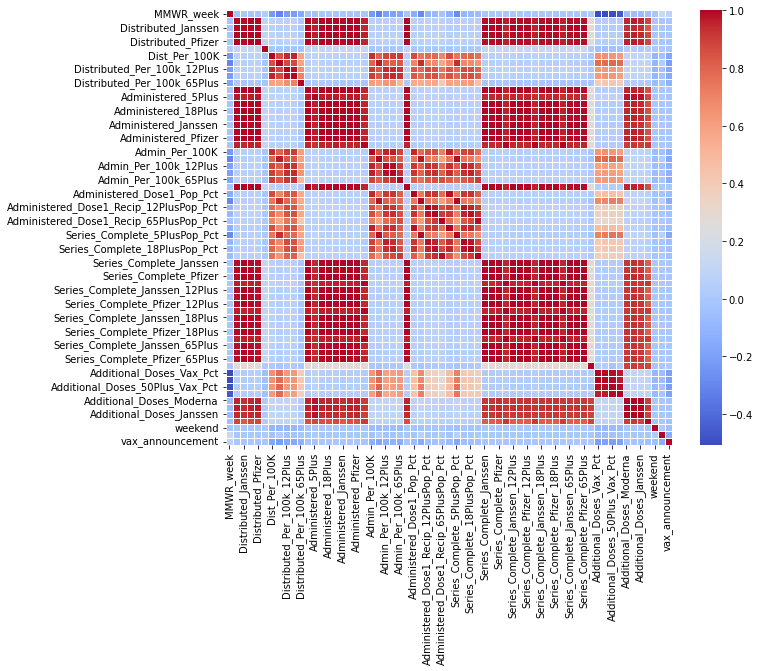

In [29]:
# heat map

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

### Dealing With NA Values

In [36]:
na = df.isna().sum()
na[na>0]
# biggest missing values in regard to 5 plus population
# could be because vaccines were rolled out to the population but did not include people from ages 5-12 
# going to change the start date to when people of all ages could get vaccine

Distributed_Per_100k_5Plus               448
Administered_5Plus                       448
Administered_Unk_Manuf                     3
Admin_Per_100k_5Plus                     448
Administered_Dose1_Recip_5PlusPop_Pct    448
Series_Complete_5PlusPop_Pct             448
Series_Complete_Unk_Manuf                  4
Series_Complete_Unk_Manuf_12Plus           4
Series_Complete_Unk_Manuf_18Plus           4
Series_Complete_Unk_Manuf_65Plus           9
Additional_Doses_Vax_Pct                 260
Additional_Doses_18Plus_Vax_Pct          260
Additional_Doses_65Plus_Vax_Pct          260
Additional_Doses_Moderna                 260
Additional_Doses_Pfizer                  260
Additional_Doses_Janssen                 262
Additional_Doses_Unk_Manuf               266
dtype: int64

In [39]:
# Define the given date
given_date = pd.to_datetime('2021-11-02')  # Adjust the date as needed

# Subset the DataFrame to include rows with dates greater than the given date
df = df[df['Date'] > given_date]

In [40]:
na = df.isna().sum()
na[na>0]

Administered_Unk_Manuf              3
Series_Complete_Unk_Manuf           4
Series_Complete_Unk_Manuf_12Plus    4
Series_Complete_Unk_Manuf_18Plus    4
Series_Complete_Unk_Manuf_65Plus    9
Additional_Doses_Janssen            2
Additional_Doses_Unk_Manuf          6
dtype: int64

In [42]:
df.shape

(17472, 67)

In [51]:
df2 = df.set_index('Date')

# Count missing values for each date
missing_values_count = df2.isnull().sum(axis=1)

# Sort dates by missing values count in descending order
sorted_dates = missing_values_count.sort_values(ascending=False)

sorted_dates[sorted_dates>0]

Date
2022-12-14    6
2022-12-14    6
2022-12-14    5
2022-12-14    4
2022-12-14    3
2022-12-14    3
2022-12-14    2
2022-12-14    1
2022-12-14    1
2022-12-14    1
dtype: int64

In [59]:
# all missing values from 12-14-2022, identify the states with the missing values

specific_day = '2022-12-14'  # Replace this with your desired date

# Filter the DataFrame for the specific day
specific_day_data = df.loc[df['Date'] == specific_day]

# Get the state names (column names) with missing values on the specific day
rows_with_missing_values = specific_day_data[specific_day_data.isnull().any(axis=1)]


location_values = rows_with_missing_values['Location'].tolist()
location_values

['VI', 'PW', 'BP2', 'AS', 'MP', 'FM', 'VA2', 'MH', 'IH2', 'ND']

In [65]:
df.Location.unique()

array(['NE', 'LA', 'GA', 'WY', 'CO', 'PA', 'DE', 'OR', 'WI', 'ND', 'TX',
       'MN', 'UT', 'SC', 'DC', 'NC', 'WA', 'SD', 'PR', 'RI', 'IA', 'FM',
       'PW', 'NV', 'KY', 'VI', 'WV', 'VA2', 'ME', 'ID', 'BP2', 'MP', 'US',
       'IH2', 'MS', 'IL', 'KS', 'MH', 'FL', 'MO', 'GU', 'VT', 'CT', 'OH',
       'NJ', 'DD2', 'TN', 'CA', 'MT', 'IN', 'NY', 'AL', 'VA', 'MD', 'AR',
       'HI', 'OK', 'NH', 'AZ', 'MI', 'AS', 'AK', 'MA', 'NM', 'RP'],
      dtype=object)

In [95]:
# Filter the DataFrame for dates in D2022
december_2022_data = df[(df['Date'].dt.year == 2022) & (df['Date'].dt.month == 7)]

# Print the filtered DataFrame
print(december_2022_data.Date.unique())

# in july 2022, only gathered data once a week -> will need to work on that next

['2022-07-27T00:00:00.000000000' '2022-07-20T00:00:00.000000000'
 '2022-07-13T00:00:00.000000000' '2022-07-06T00:00:00.000000000']


In [96]:
# Filter the DataFrame for dates in December 2022
december_2022_data = df[(df['Date'].dt.year == 2022) & (df['Date'].dt.month == 12)]

# Print the filtered DataFrame
print(december_2022_data.Date.unique())

['2022-12-28T00:00:00.000000000' '2022-12-21T00:00:00.000000000'
 '2022-12-14T00:00:00.000000000' '2022-12-07T00:00:00.000000000']


In [105]:
for location in location_values:
    # Subset data for the current location
    location_data = df[df['Location'] == location]
    
    # Subset data for the specific dates
    dates_to_impute = location_data[location_data['Date'].isin(['2022-12-07', '2022-12-14'])]
    
    # Perform forward fill (LOCF) imputation for the specific location and dates
    imputed_data = dates_to_impute.fillna(method='ffill', limit=1)
    
    # Update the original DataFrame with the imputed data for the current location
    df.update(imputed_data)


In [106]:
df.isna().sum()

Date                   0
MMWR_week              0
Location               0
Distributed            0
Distributed_Janssen    0
                      ..
day_of_week            0
weekend                0
season                 0
holiday_season         0
vax_announcement       0
Length: 67, dtype: int64